# Plots
Before committing to a supervised algorithm, it is useful to plot the data. This allows us to assess distribution and dependence between data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from featexp import univariate_plotter, get_trend_stats, get_univariate_plots
%matplotlib inline

In [2]:
df_iter = pd.read_csv('data/df_train_scaled.csv.zip', iterator=True, chunksize=50_000, index_col=0)
df_iter_test = pd.read_csv('data/df_test_scaled.csv.zip', iterator=True, chunksize=50_000, index_col=0)

df = pd.concat(df_iter)
df_test = pd.concat(df_iter_test)

df.head()

,loan_status,purp_other,open_acc,int_rate,e_fin,home_ownership,purp_major_purchase,e_health,mort_acc,term,...,pub_rec,purp_moving,revol_util,grade,dti,e_exec,purp_home_improvement,installment,annual_inc,time_delta
2139270,1,0,-0.843970,0.190831,0,2.196862,0,0,-0.718077,-0.565438,...,0.0,0,51.5,-1.817008,-0.298426,0,0,-0.788166,-1.073069,-1.650690
2139245,1,0,0.075527,0.653814,0,-0.899632,0,1,-0.718077,-0.565438,...,0.0,0,92.3,-2.586479,-0.506489,0,0,-1.440208,-0.507501,-1.617180
2139236,1,0,-0.292272,-1.133175,0,0.648615,0,0,-0.718077,-0.565438,...,0.0,0,10.2,1.260876,-1.994382,0,0,-1.099830,0.855853,0.612900
2139235,1,0,0.995025,-0.536115,0,-0.899632,0,0,-0.718077,-0.565438,...,0.0,1,32.4,-0.278066,-1.845593,0,0,-1.365033,-1.110524,-1.628596
2139225,1,0,0.627226,-0.999098,1,0.648615,0,0,-0.718077,-0.565438,...,0.0,0,24.4,1.260876,-1.698013,0,1,-0.870123,1.324038,-0.227063


In [3]:
df.describe()

,loan_status,purp_other,open_acc,int_rate,e_fin,home_ownership,purp_major_purchase,e_health,mort_acc,term,...,pub_rec,purp_moving,revol_util,grade,dti,e_exec,purp_home_improvement,installment,annual_inc,time_delta
count,1.292073e+06,1.292073e+06,1.292073e+06,1.292073e+06,1.292073e+06,1.292073e+06,1.292073e+06,1.292073e+06,1.292073e+06,1.292073e+06,...,1.292073e+06,1.292073e+06,1.292073e+06,1.292073e+06,1.292073e+06,1.292073e+06,1.292073e+06,1.292073e+06,1.292073e+06,1.292073e+06
mean,7.979750e-01,5.725992e-02,4.760738e-16,1.937307e-13,6.458846e-02,-1.450199e-15,2.166828e-02,5.677930e-02,-3.695198e-16,2.264514e-16,...,2.162370e-01,7.006570e-03,5.199814e+01,-3.383686e-16,-1.776581e-15,5.820724e-02,6.467823e-02,-1.180237e-14,2.081045e-16,2.781278e-17
std,4.015109e-01,2.323387e-01,9.999617e-01,9.999617e-01,2.457984e-01,9.999617e-01,1.455980e-01,2.314205e-01,9.999617e-01,9.999617e-01,...,6.046136e-01,8.341153e-02,2.448329e+01,9.999617e-01,9.999617e-01,2.341350e-01,2.459573e-01,9.999617e-01,9.999617e-01,9.999617e-01
min,0.000000e+00,0.000000e+00,-2.193483e+00,-1.762042e+00,0.000000e+00,-6.546415e+00,0.000000e+00,0.000000e+00,-1.028790e+00,-6.601010e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.533714e+00,-2.368850e+00,0.000000e+00,0.000000e+00,-1.771216e+00,-1.846624e+00,-1.958918e+00
25%,1.000000e+00,0.000000e+00,-7.013079e-01,-7.408811e-01,0.000000e+00,-9.767134e-01,0.000000e+00,0.000000e+00,-8.022653e-01,-5.778845e-01,...,0.000000e+00,0.000000e+00,3.370000e+01,-8.391496e-01,-6.094822e-01,0.000000e+00,0.000000e+00,-7.281705e-01,-4.587284e-01,-6.752145e-01
50%,1.000000e+00,0.000000e+00,-1.816149e-01,-9.360220e-02,0.000000e+00,2.459795e-01,0.000000e+00,0.000000e+00,-3.646967e-01,-5.505348e-01,...,0.000000e+00,0.000000e+00,5.240000e+01,-1.504576e-01,-6.159193e-02,0.000000e+00,0.000000e+00,-2.385894e-01,-1.652431e-01,-2.017440e-01
75%,1.000000e+00,0.000000e+00,5.152814e-01,5.775717e-01,0.000000e+00,4.870230e-01,0.000000e+00,0.000000e+00,5.429531e-01,-4.928343e-01,...,0.000000e+00,0.000000e+00,7.090000e+01,6.051974e-01,5.444509e-01,0.000000e+00,0.000000e+00,5.460992e-01,2.324311e-01,5.025789e-01
max,1.000000e+00,1.000000e+00,1.576924e+01,3.993478e+00,1.000000e+00,2.713060e+00,1.000000e+00,1.000000e+00,2.448061e+01,2.748737e+00,...,8.600000e+01,1.000000e+00,8.923000e+02,1.515794e+00,9.651134e+01,1.000000e+00,1.000000e+00,5.050154e+00,1.204179e+02,9.106108e+00


In [4]:
#get continuous target variables
cont_cols = [x for x in df.columns if len(df[x].value_counts())>10]

cont_cols

['open_acc',
 'int_rate',
 'home_ownership',
 'mort_acc',
 'term',
 'revol_bal',
 'pub_rec_bankruptcies',
 'total_acc',
 'loan_amnt',
 'emp_length',
 'sub_grade',
 'pub_rec',
 'revol_util',
 'grade',
 'dti',
 'installment',
 'annual_inc',
 'time_delta']

# 1.0 Pearson Correlation

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

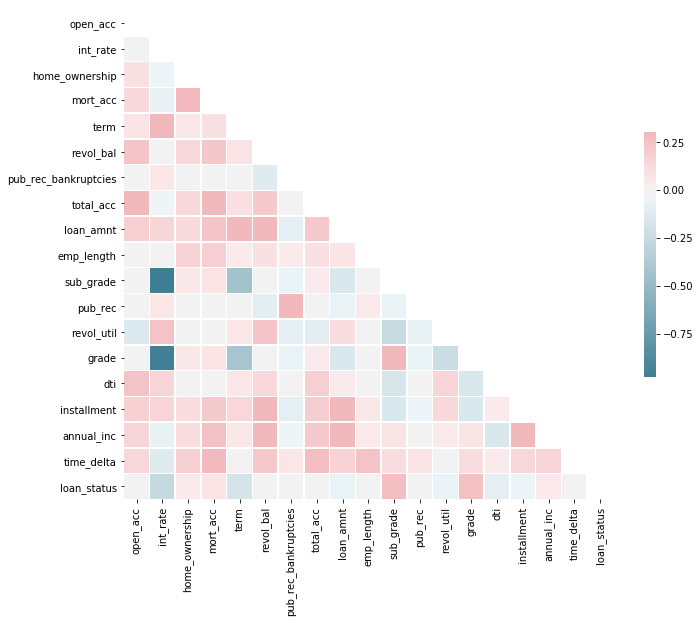

In [5]:
# Compute the correlation matrix
corr = df[cont_cols+['loan_status']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

From this correlation heatmap, it is evident that a higher grade/sub grade means lower interest rates. This is typical for lending companies to ask for a higher interest with riskier applicants

## Histograms

In [6]:
df_paid = df[df['loan_status']==1]
df_default = df[df['loan_status']==0]

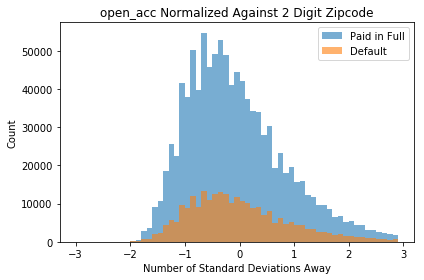

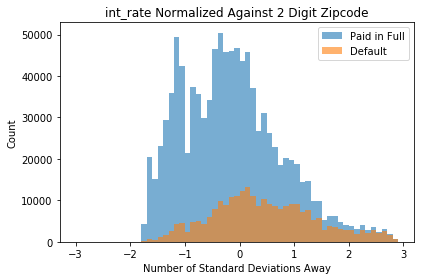

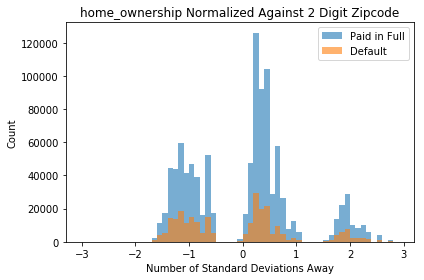

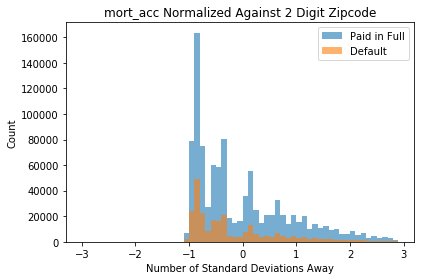

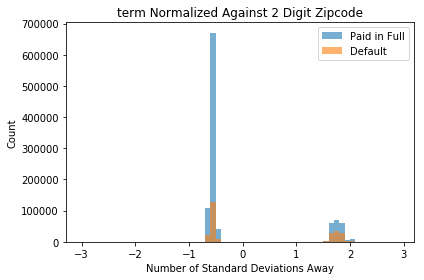

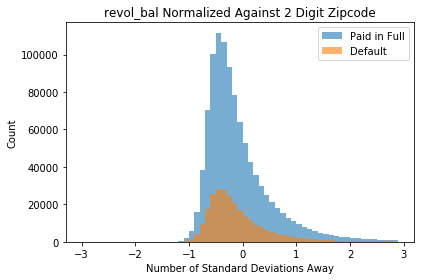

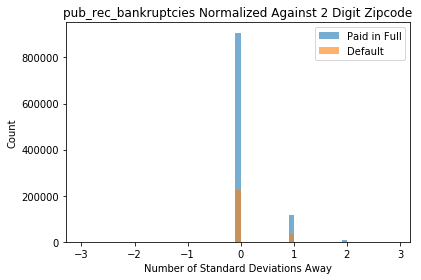

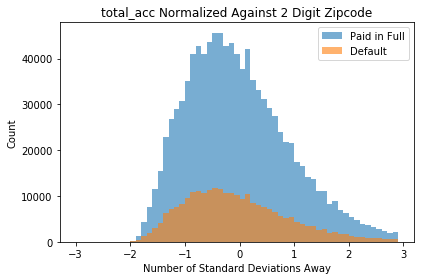

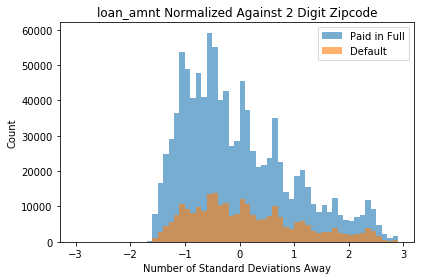

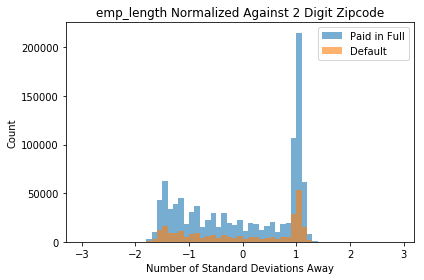

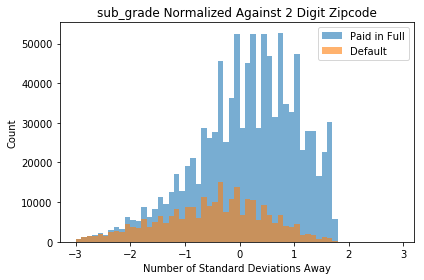

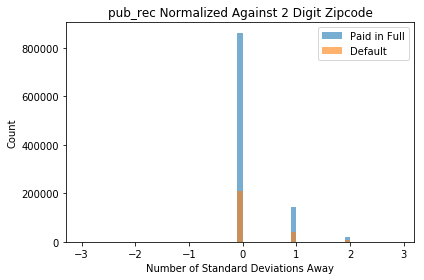

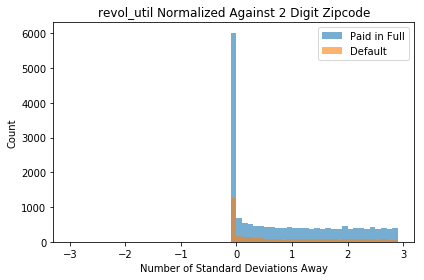

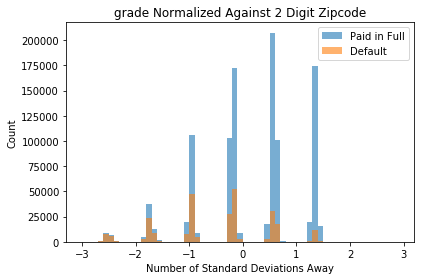

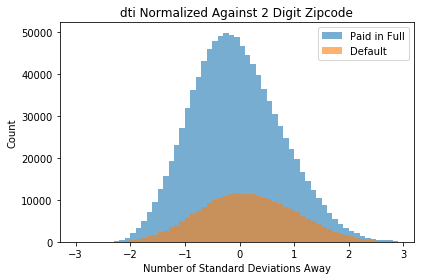

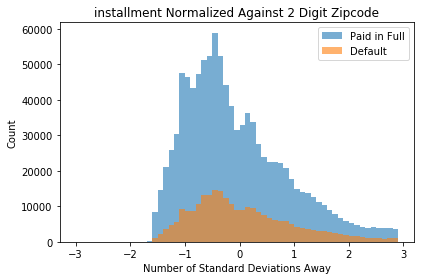

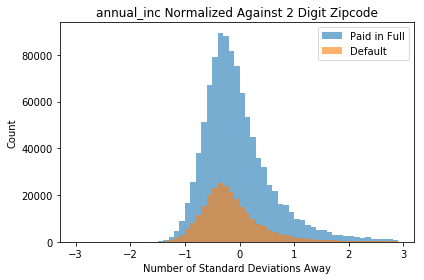

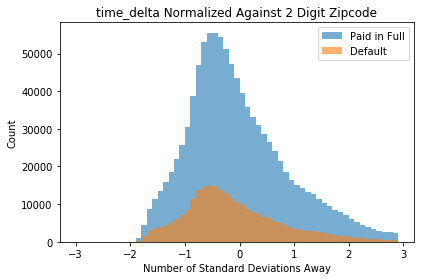

In [7]:
for c in cont_cols:
    plt.hist(df_paid[c], bins=np.arange(-3, 3, 0.1), label='Paid in Full', alpha=0.6)
    plt.hist(df_default[c], bins=np.arange(-3, 3, 0.1), label='Default', alpha=0.6)
    plt.ylabel("Count")
    plt.xlabel("Number of Standard Deviations Away")
    plt.title("{} Normalized Against 2 Digit Zipcode".format(c))
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join('plots','hist_'+c+'.png'))
    plt.show()

# Univariate Plots

                                          Plots for open_acc                                          
                                           Train data plots                                           


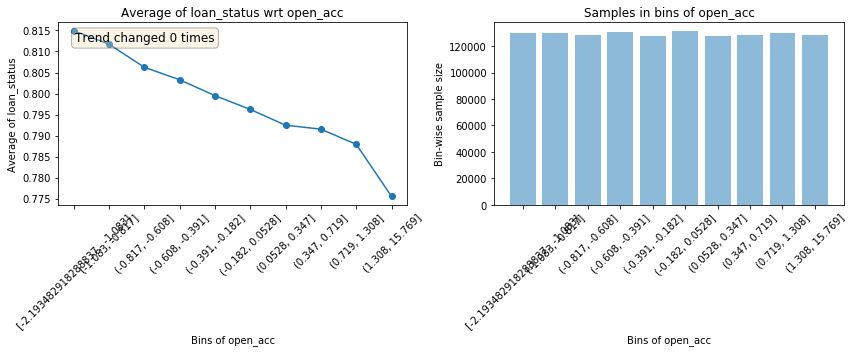

                                           Test data plots                                            


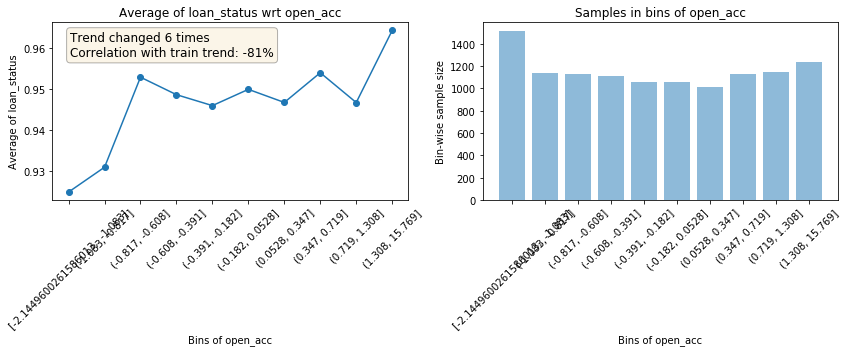

--------------------------------------------------------------------------------------------------------------


                                          Plots for int_rate                                          
                                           Train data plots                                           


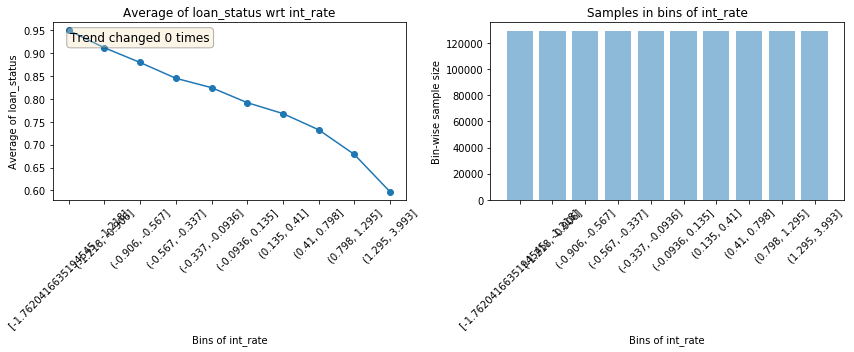

                                           Test data plots                                            


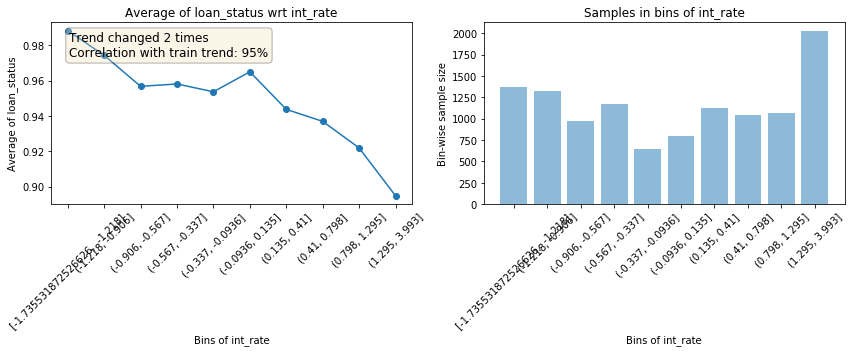

--------------------------------------------------------------------------------------------------------------


                                       Plots for home_ownership                                       
                                           Train data plots                                           


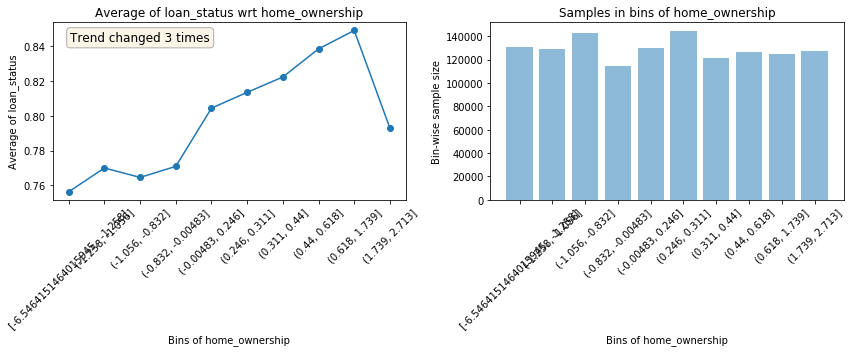

                                           Test data plots                                            


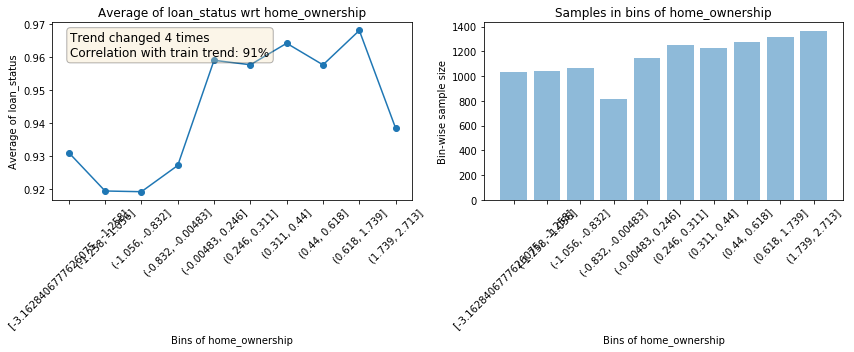

--------------------------------------------------------------------------------------------------------------


                                          Plots for mort_acc                                          
                                           Train data plots                                           


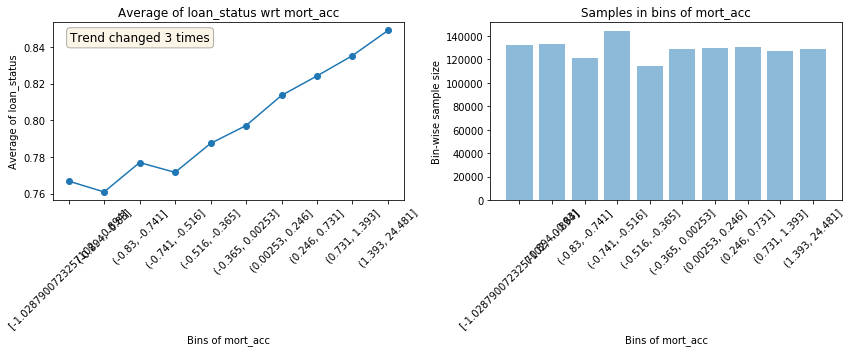

                                           Test data plots                                            


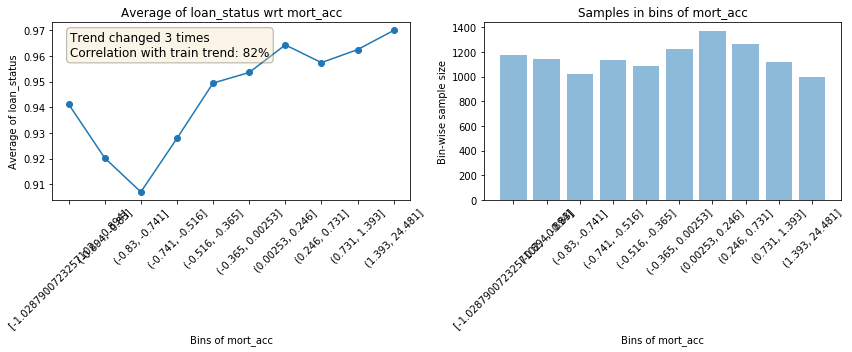

--------------------------------------------------------------------------------------------------------------


                                            Plots for term                                            
                                           Train data plots                                           


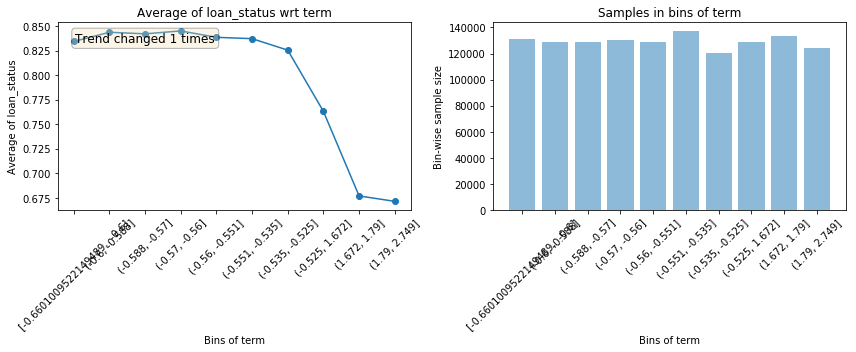

                                           Test data plots                                            


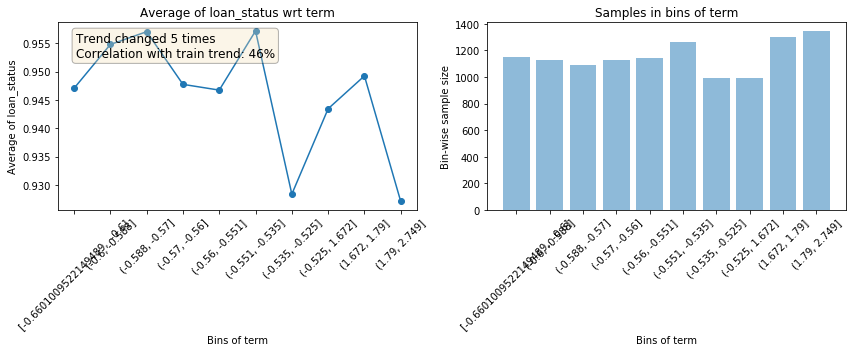

--------------------------------------------------------------------------------------------------------------


                                         Plots for revol_bal                                          
                                           Train data plots                                           


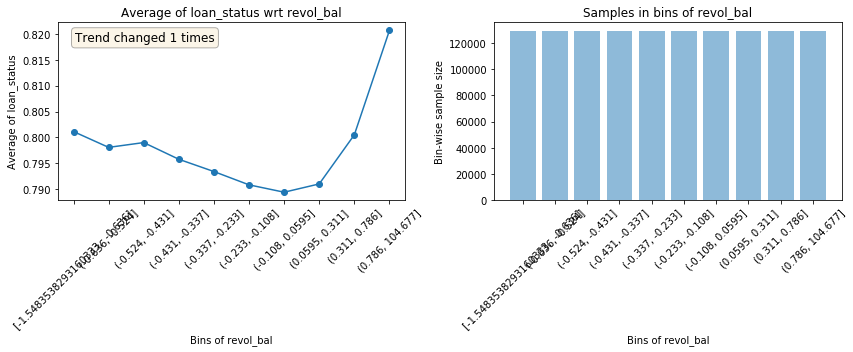

                                           Test data plots                                            


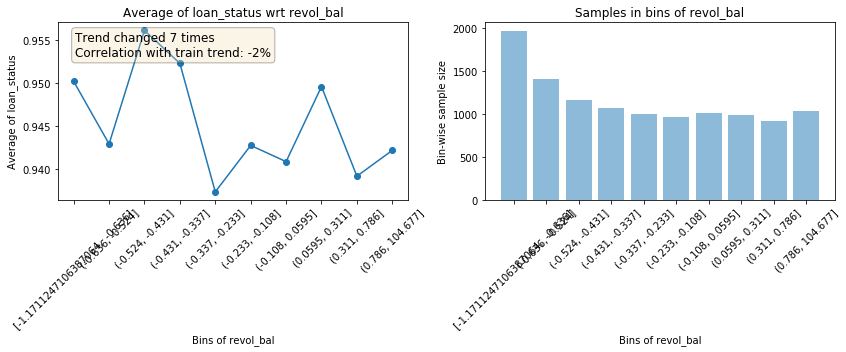

--------------------------------------------------------------------------------------------------------------


                                    Plots for pub_rec_bankruptcies                                    
                                           Train data plots                                           


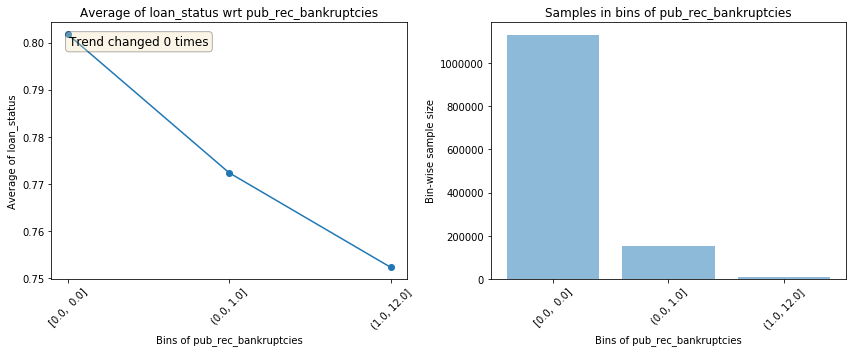

                                           Test data plots                                            


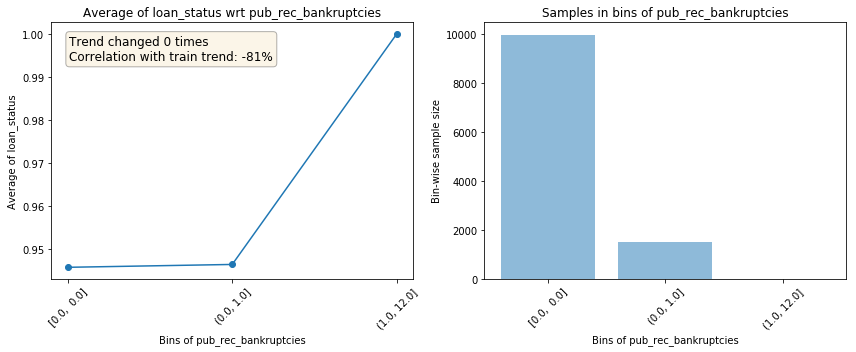

--------------------------------------------------------------------------------------------------------------


                                         Plots for total_acc                                          
                                           Train data plots                                           


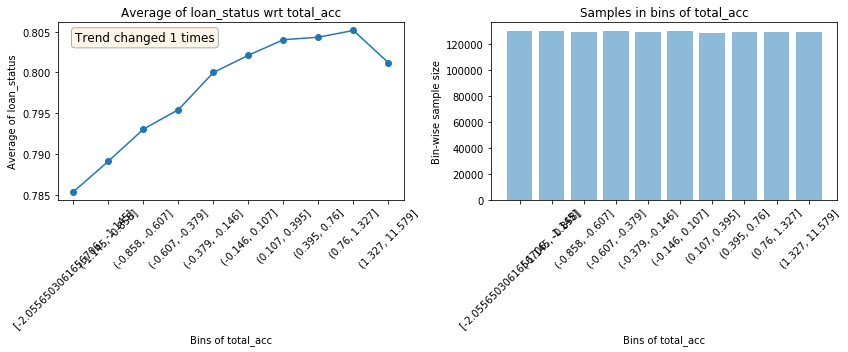

                                           Test data plots                                            


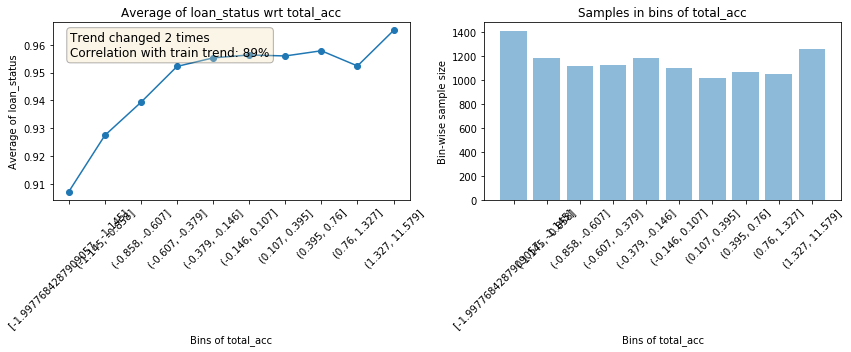

--------------------------------------------------------------------------------------------------------------


                                         Plots for loan_amnt                                          
                                           Train data plots                                           


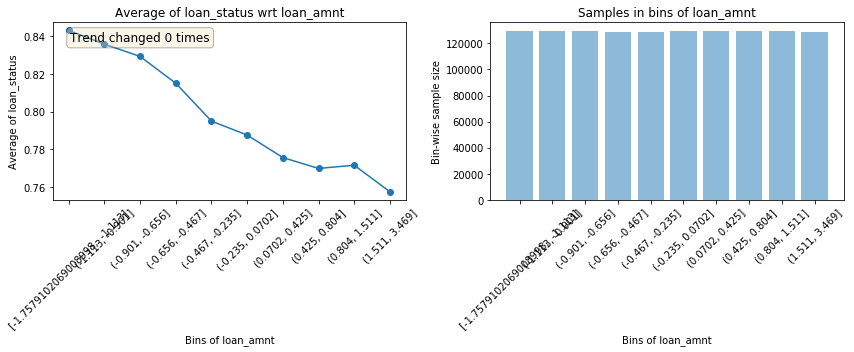

                                           Test data plots                                            


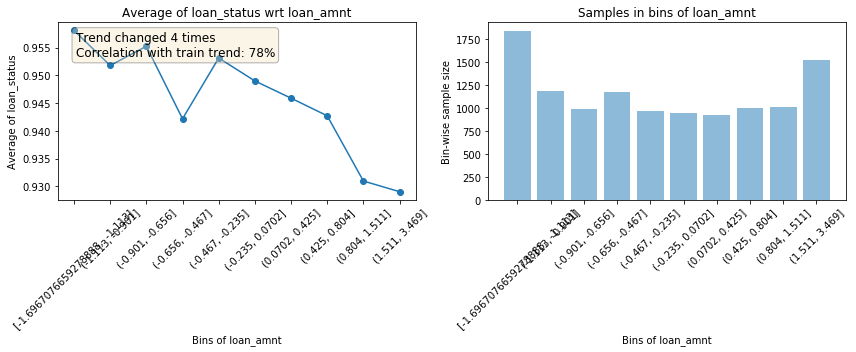

--------------------------------------------------------------------------------------------------------------


                                         Plots for emp_length                                         
                                           Train data plots                                           


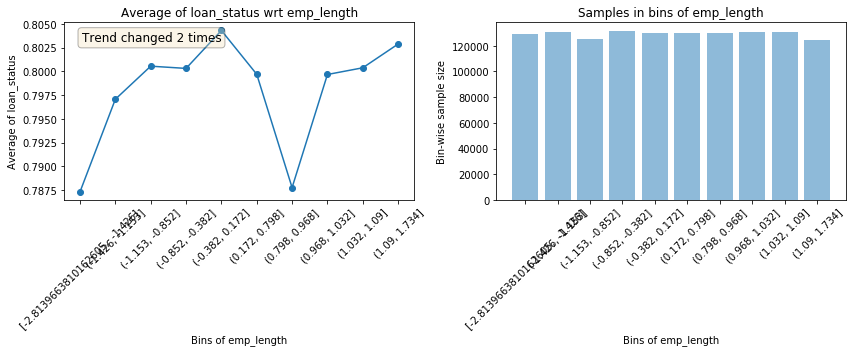

                                           Test data plots                                            


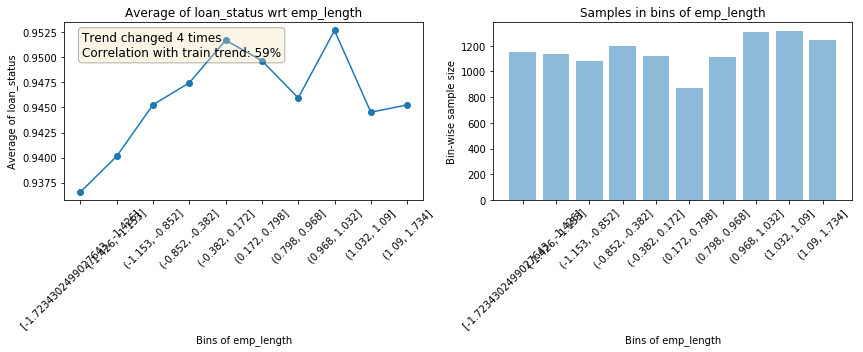

--------------------------------------------------------------------------------------------------------------


                                         Plots for sub_grade                                          
                                           Train data plots                                           


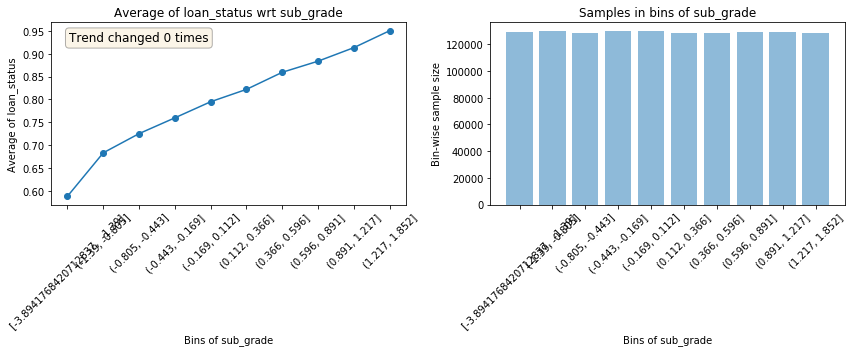

                                           Test data plots                                            


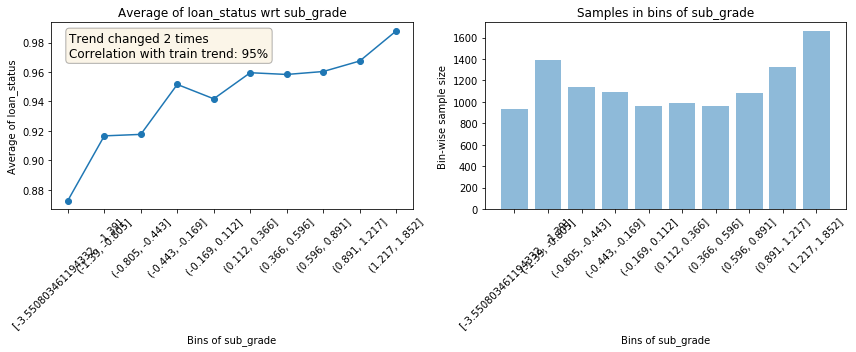

--------------------------------------------------------------------------------------------------------------


                                          Plots for pub_rec                                           
                                           Train data plots                                           


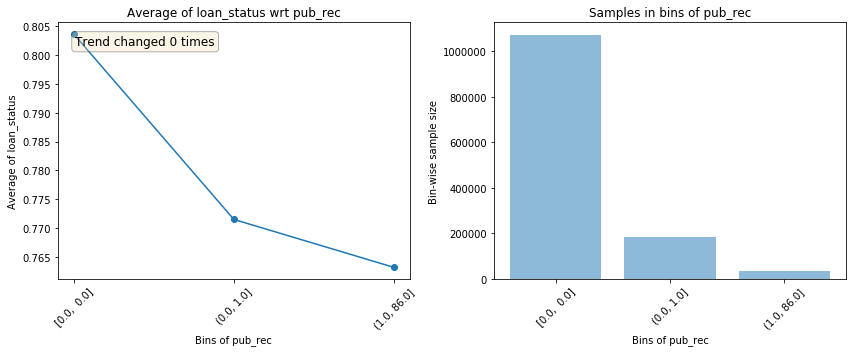

                                           Test data plots                                            


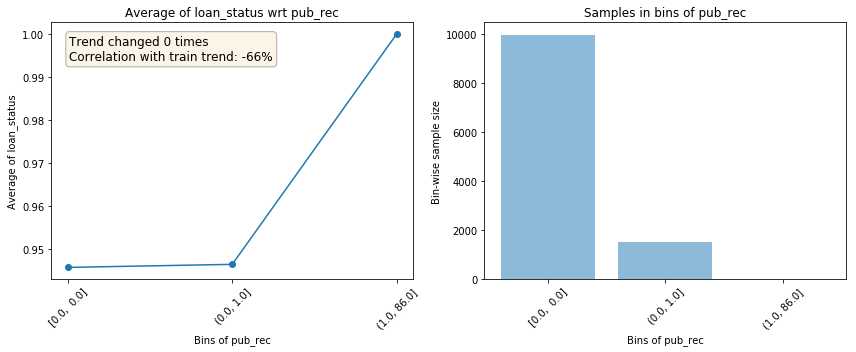

--------------------------------------------------------------------------------------------------------------


                                         Plots for revol_util                                         
                                           Train data plots                                           


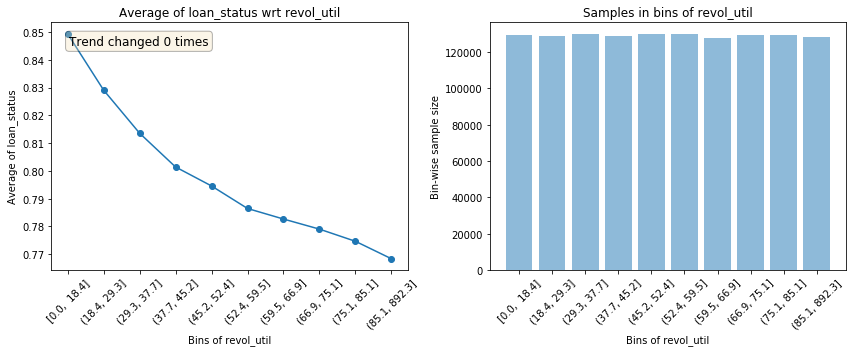

                                           Test data plots                                            


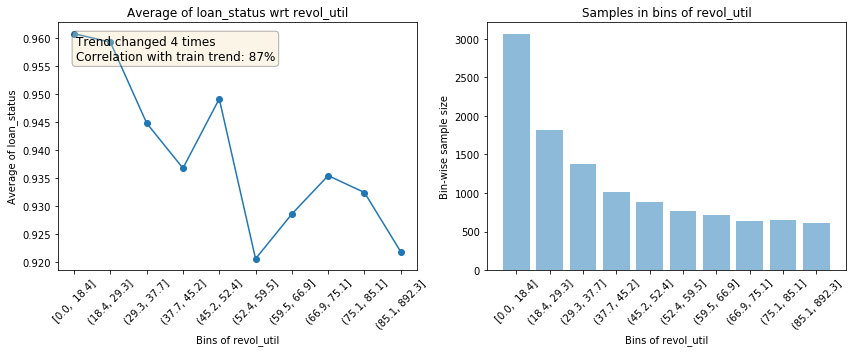

--------------------------------------------------------------------------------------------------------------


                                           Plots for grade                                            
                                           Train data plots                                           


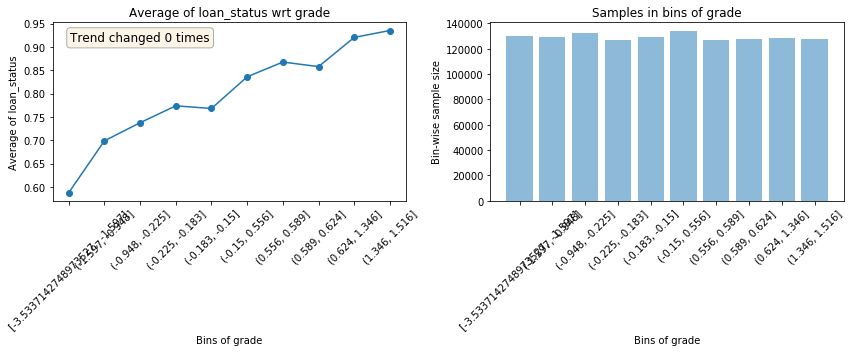

                                           Test data plots                                            


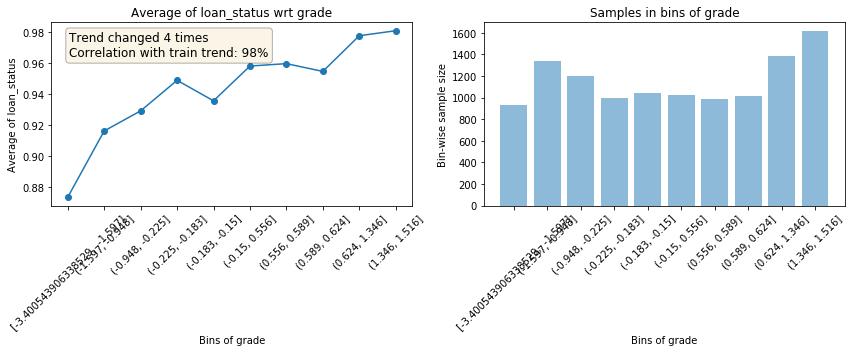

--------------------------------------------------------------------------------------------------------------


                                            Plots for dti                                             
                                           Train data plots                                           


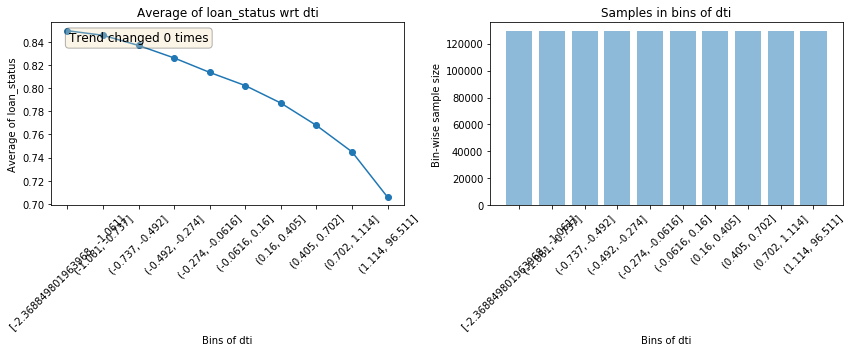

                                           Test data plots                                            


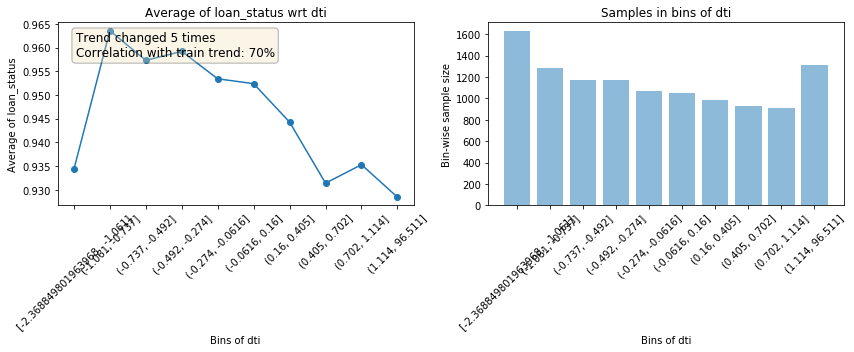

--------------------------------------------------------------------------------------------------------------


                                        Plots for installment                                         
                                           Train data plots                                           


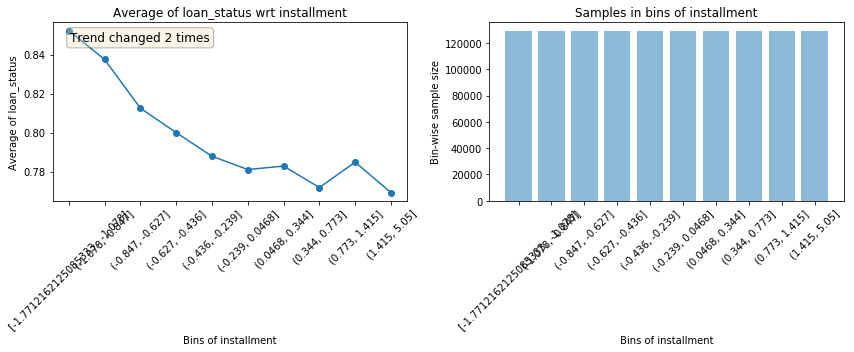

                                           Test data plots                                            


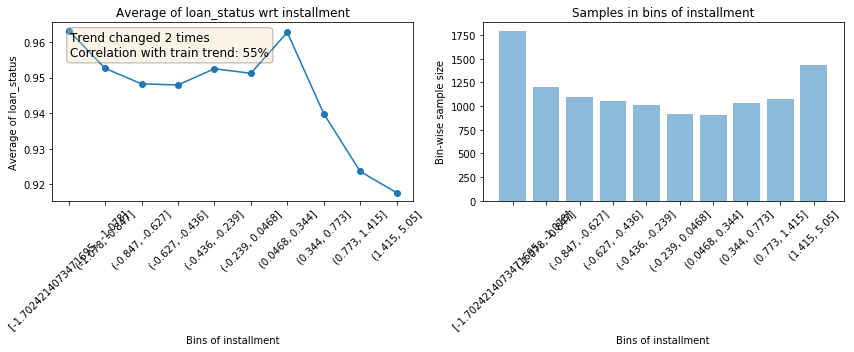

--------------------------------------------------------------------------------------------------------------


                                         Plots for annual_inc                                         
                                           Train data plots                                           


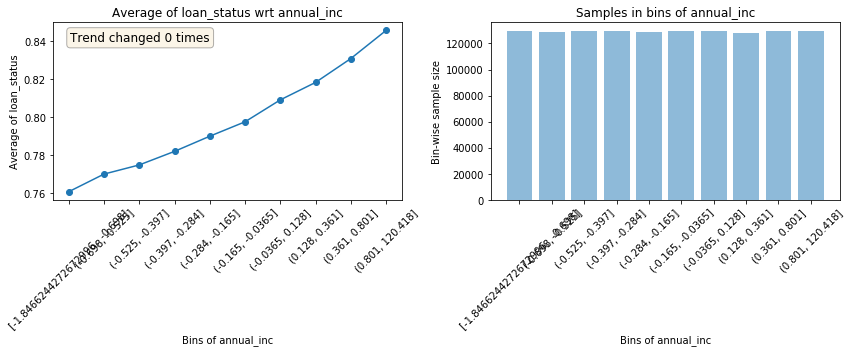

                                           Test data plots                                            


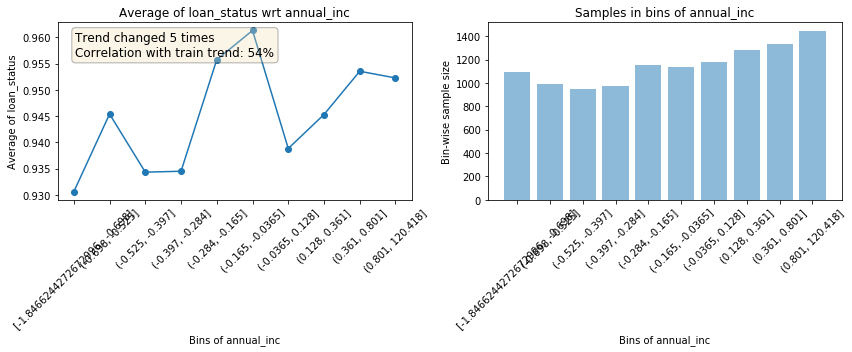

--------------------------------------------------------------------------------------------------------------


                                         Plots for time_delta                                         
                                           Train data plots                                           


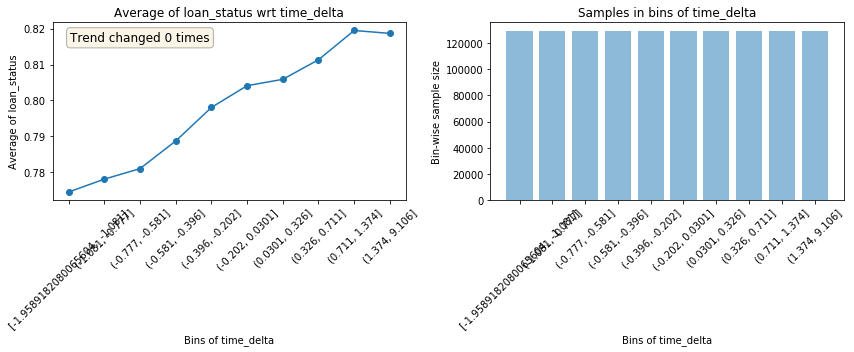

                                           Test data plots                                            


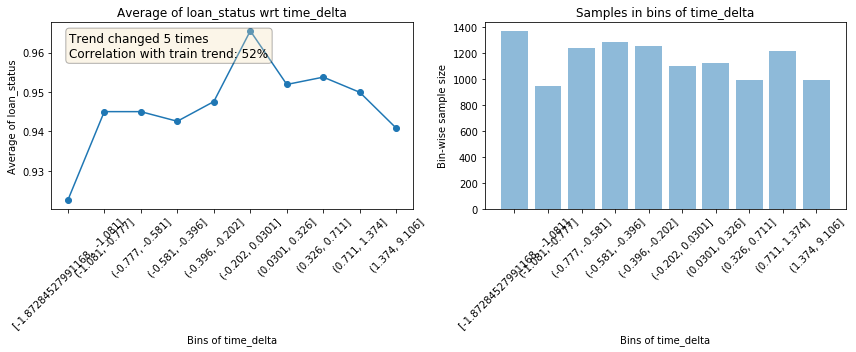

--------------------------------------------------------------------------------------------------------------




In [8]:
get_univariate_plots(data=df, 
                     target_col='loan_status', 
                     features_list=cont_cols,
                     data_test= df_test)

# Feauture Intereaction
From simplcity and ease of illustration, draw some samples from defaulted and paid loans

In [13]:
df_paid_sample = df_paid.sample(n=2000)
df_default_sample = df_default.sample(n=2000)

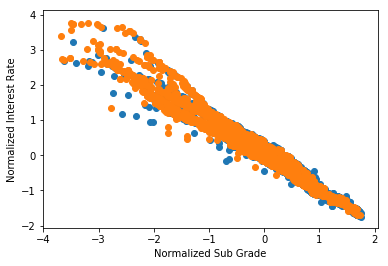

In [15]:
plt.scatter(x=df_paid_sample['sub_grade'], y=df_paid_sample['int_rate'])
plt.scatter(x=df_default_sample['sub_grade'], y=df_default_sample['int_rate'])
plt.ylabel("Normalized Interest Rate")
plt.xlabel("Normalized Sub Grade")
plt.show()